# Sprint 19 - Segmentation 1 - Unet

## Problem 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.92 MiB | 30.50 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [3]:
ls

drive/  sample_data/  unet/


In [4]:
cd unet/

/content/unet


In [5]:
!python main.py

Using TensorFlow backend.
2020-08-02 09:57:53.549044: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-02 09:57:55.656660: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-02 09:57:55.726208: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-08-02 09:57:55.726309: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b13cf648b7fb): /proc/driver/nvidia/version does not exist
2020-08-02 09:57:55.772497: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300000000 Hz
2020-08-02 09:57:55.772867: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1382bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-02 09:57:5

In [20]:
import glob
dir_str = "/content/unet/data/membrane/test"
imgs = glob.glob(dir_str + '/*' + '.png')

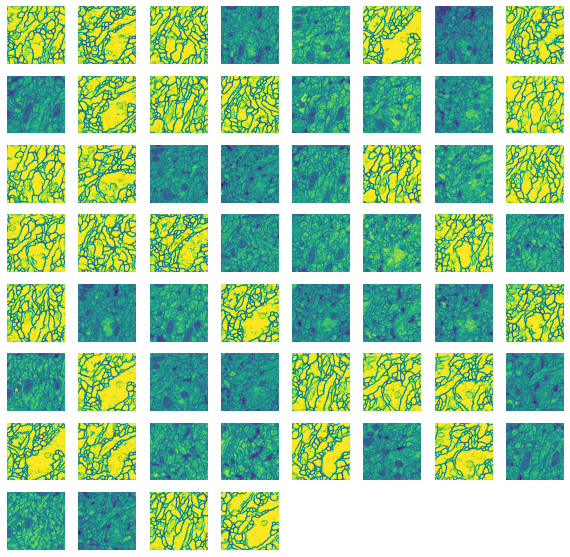

In [21]:
from matplotlib import pyplot as plt
import cv2
import re
from PIL import Image
import numpy as np

height = 256
width = 256
img_array = np.empty((0, height, width))
n_imgs = len(imgs)

plt.figure(figsize=(10, 10))
for itr, img in enumerate(imgs):
        img_tensor = Image.open(img)
        img_tensor = np.asarray(img_tensor)
        img_tensor = cv2.resize(img_tensor, dsize=(height, width))
        img_tensor = img_tensor.reshape(1, height, width)
        img_array = np.append(img_array, img_tensor, axis=0)

for itr, img in enumerate(img_array):
    plt.subplot(int(np.sqrt(n_imgs))+1, int(np.sqrt(n_imgs))+1, itr+1)
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

In [30]:
mkdir .kaggle

In [10]:
import json

token = {"username":"diopmouhamed","key":"801298c5af3fd14840ade3eca5c7b616"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [11]:
!chmod 600 /content/.kaggle/kaggle.json

In [33]:
mkdir　/root/.kaggle/

In [12]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [13]:
import os

os.chdir('/content/drive/My Drive/')
print(os.getcwd())

/content/drive/My Drive


In [40]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 2.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=6725ecdcd8735e974566341fc65530a9f5f09568f36b6922fbb44c792933af0a
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [43]:
!kaggle --version

Kaggle API 1.5.6


In [8]:
!pip install kaggle==1.5.6

Processing /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674/kaggle-1.5.6-cp36-none-any.whl


In [19]:
!kaggle competitions download -c tgs-salt-identification-challenge --force

 98% 437M/445M [00:02<00:00, 155MB/s]
100% 445M/445M [00:02<00:00, 162MB/s]


In [24]:
!unzip /content/drive/'My Drive'/tgs-salt-identification-challenge.zip -d Sprint_19

Archive:  /content/drive/My Drive/tgs-salt-identification-challenge.zip
  inflating: Sprint_19/competition_data.zip  
  inflating: Sprint_19/depths.csv    
  inflating: Sprint_19/flamingo.zip  
  inflating: Sprint_19/sample_submission.csv  
  inflating: Sprint_19/test.zip      
  inflating: Sprint_19/train.csv     
  inflating: Sprint_19/train.zip     


In [26]:
!unzip /content/drive/'My Drive'/Sprint_19/train.zip -d /content/drive/'My Drive'/train_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/train_data/images/b012e9ebb0.png  
  inflating: /content/drive/My Drive/train_data/images/d3034e7a60.png  
  inflating: /content/drive/My Drive/train_data/images/ae2ef70d51.png  
  inflating: /content/drive/My Drive/train_data/images/1af44a9db0.png  
  inflating: /content/drive/My Drive/train_data/images/41cfd4b320.png  
  inflating: /content/drive/My Drive/train_data/images/853e89d0d3.png  
  inflating: /content/drive/My Drive/train_data/images/2a484baa26.png  
  inflating: /content/drive/My Drive/train_data/images/92e617896e.png  
  inflating: /content/drive/My Drive/train_data/images/b70f0ab0c2.png  
  inflating: /content/drive/My Drive/train_data/images/e8757626a1.png  
  inflating: /content/drive/My Drive/train_data/images/6a3d92ce59.png  
  inflating: /content/drive/My Drive/train_data/images/127ef4105f.png  
  inflating: /content/drive/My Drive/train_data/images/d21012f5c1.png  
  inflating: 

In [27]:
!unzip /content/drive/'My Drive'/Sprint_19/test.zip -d /content/drive/'My Drive'/test_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/test_data/images/187ecc32d5.png  
  inflating: /content/drive/My Drive/test_data/images/54538419f5.png  
  inflating: /content/drive/My Drive/test_data/images/93614d4b95.png  
  inflating: /content/drive/My Drive/test_data/images/50a91adce8.png  
  inflating: /content/drive/My Drive/test_data/images/97d23cea10.png  
  inflating: /content/drive/My Drive/test_data/images/ca04c19c0b.png  
  inflating: /content/drive/My Drive/test_data/images/d168218bac.png  
  inflating: /content/drive/My Drive/test_data/images/a670e833a4.png  
  inflating: /content/drive/My Drive/test_data/images/a964a0f499.png  
  inflating: /content/drive/My Drive/test_data/images/371bf59030.png  
  inflating: /content/drive/My Drive/test_data/images/fc74f77bae.png  
  inflating: /content/drive/My Drive/test_data/images/f63dc1e3be.png  
  inflating: /content/drive/My Drive/test_data/images/b807539a5f.png  
  inflating: /content/driv

In [51]:
from model import *
from data import *

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,
                        '/content/drive/My Drive/train_data',
                        'images',
                        'masks',
                        data_gen_args,save_to_dir = None,
                        )

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=3,callbacks=[model_checkpoint])

/content/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/3
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
300/300 [==============================] - 4240s 14s/step - loss: 0.6165 - accuracy: 0.7373

Epoch 00001: loss improved from inf to 0.61652, saving model to unet_membrane.hdf5
Epoch 2/3
300/300 [==============================] - 4256s 14s/step - loss: 0.5742 - accuracy: 0.7445

Epoch 00002: loss improved from 0.61652 to 0.57417, saving model to unet_membrane.hdf5
Epoch 3/3
300/300 [==============================] - 4236s 14s/step - loss: 0.5161 - accuracy: 0.7616

Epoch 00003: loss improved from 0.57417 to 0.51607, saving model to unet_membrane.hdf5


In [53]:
t_list = glob.glob('/content/drive/My Drive/test_data/images' + '/*' + ".png")
len(t_list) 

18000

In [54]:
def testGenerator(test_path,num_image = 30,
                  target_size = (256,256),
                  flag_multi_class = False,
                  as_gray = True):
    for i in range(num_image):
        img = io.imread(os.path.join(t_list[i]),as_gray = as_gray)
        img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img

In [55]:
testGene = testGenerator("/content/drive/My Drive/test_data/images")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("/content/drive/My Drive/test_data/results",results)

30/30 [==============================] - 57s 2s/step


/content/unet/data.py:124: UserWarning: /content/drive/My Drive/test_data/results/0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/unet/data.py:124: UserWarning: /content/drive/My Drive/test_data/results/1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/unet/data.py:124: UserWarning: /content/drive/My Drive/test_data/results/2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/unet/data.py:124: UserWarning: /content/drive/My Drive/test_data/results/3_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/unet/data.py:124: UserWarning: /content/drive/My Drive/test_data/results/4_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/unet/data.py:124: UserWarning: /content/drive/My Drive/test_data/results/5_predict.png is a

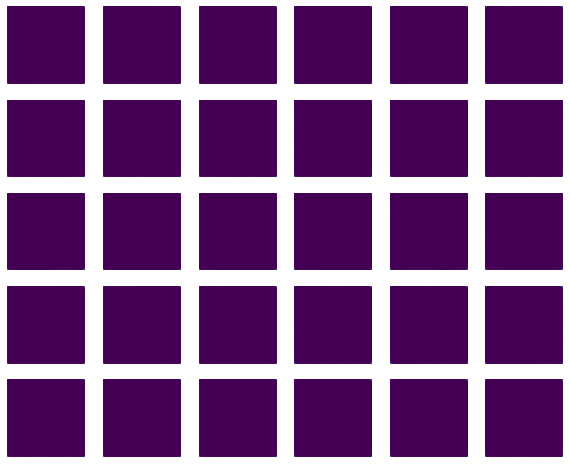

In [61]:
pre_list = glob.glob('/content/drive/My Drive/test_data/results' + '/*' + ".png")

from matplotlib import pyplot as plt
import cv2
import re
from PIL import Image
import numpy as np

height = 256
width = 256
img_array = np.empty((0, height, width))
n_imgs = len(pre_list)

plt.figure(figsize=(10, 10))
for itr, img in enumerate(pre_list):
        img_tensor = Image.open(img)
        img_tensor = np.asarray(img_tensor)
        img_tensor = cv2.resize(img_tensor, dsize=(height, width))
        img_tensor = img_tensor.reshape(1, height, width)
        img_array = np.append(img_array, img_tensor, axis=0)

for itr, img in enumerate(img_array):
    plt.subplot(int(np.sqrt(n_imgs))+1, int(np.sqrt(n_imgs))+1, itr+1)
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

## Problem 2

**Read the Paper (https://arxiv.org/pdf/1505.04597.pdf) and the Code.**

- In the paper, a network and training strategy has been presented relying on the strong use of data augmentation. The fully conventional network has been modified and extended for more precise segmentations results.
- Based on the code, we see that the implementation is done in many levels. The data.py has functions for converting image data to numerical data (adjustData), for expanding the image data for training (trainGenerator), for reading the test image (trainGenerator), for the normalization (labelVisualize) and for saving the results of the estimation (saveResult). the different instantitations are located in the main.py and the model.py is where the model itself is define like the pooling, activation, up-sampling and so on.